In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
df.drop('sepal_length',axis=1,inplace=True)

In [14]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [16]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
df.isnull().sum()

sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

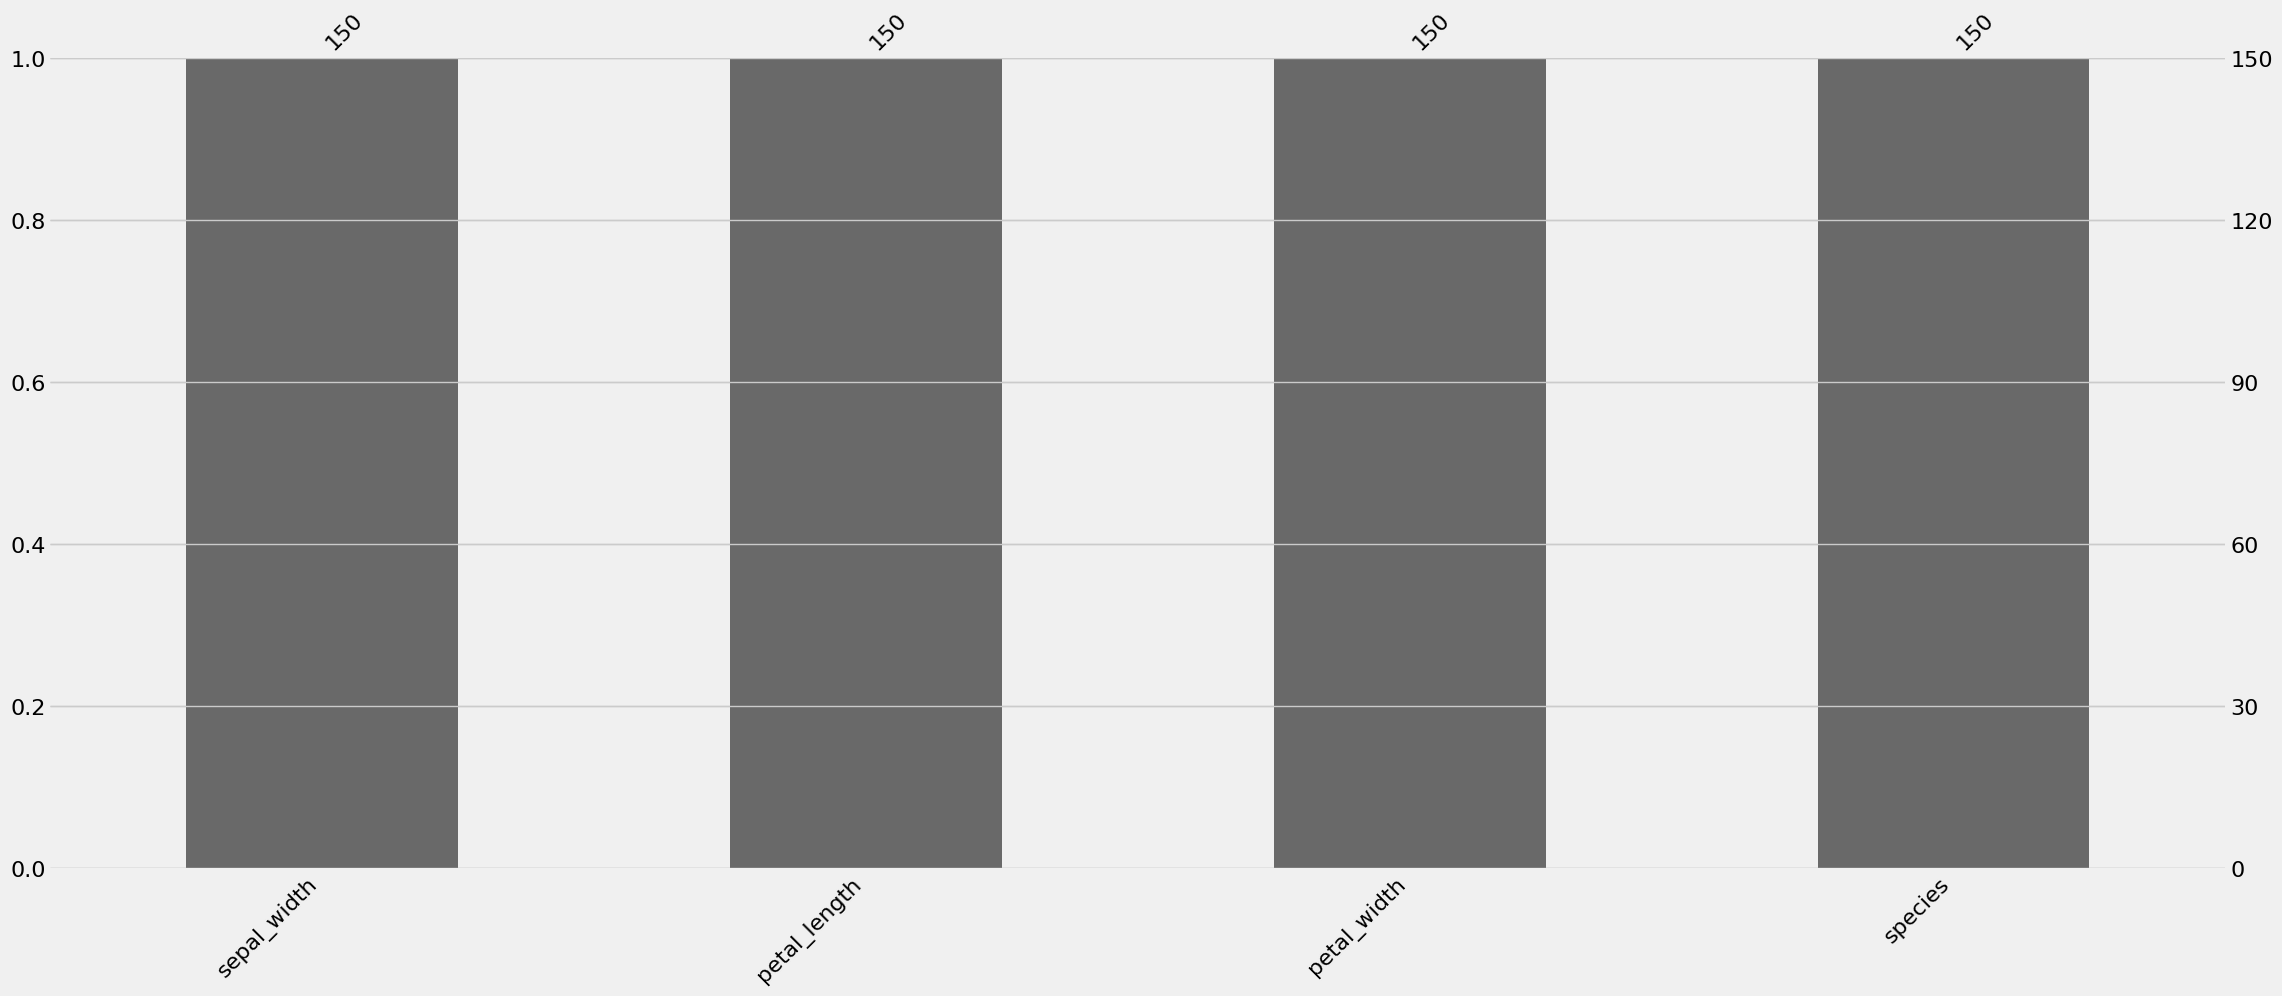

In [18]:
import missingno as msno
msno.bar(df)

In [19]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='species', ylabel='petal_length'>

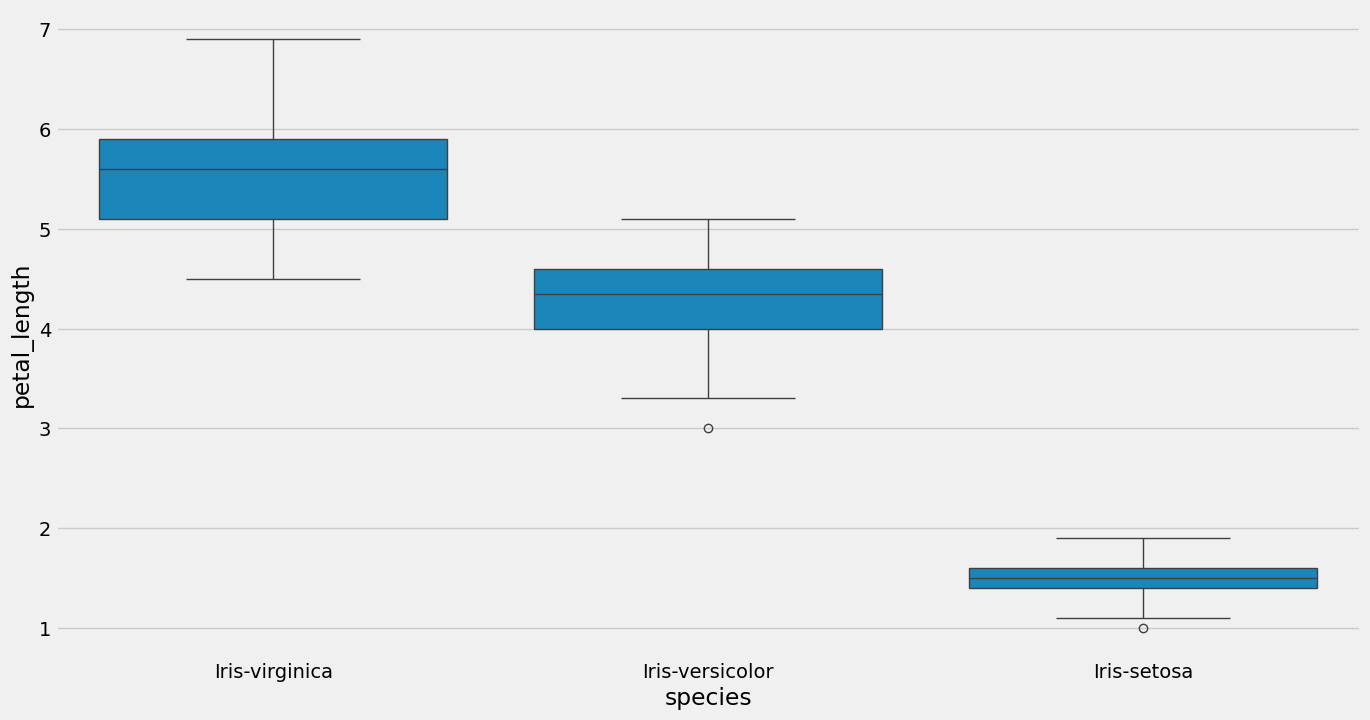

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='petal_length',data=df.sort_values('petal_length',ascending=False))

<Axes: xlabel='sepal_width', ylabel='petal_length'>

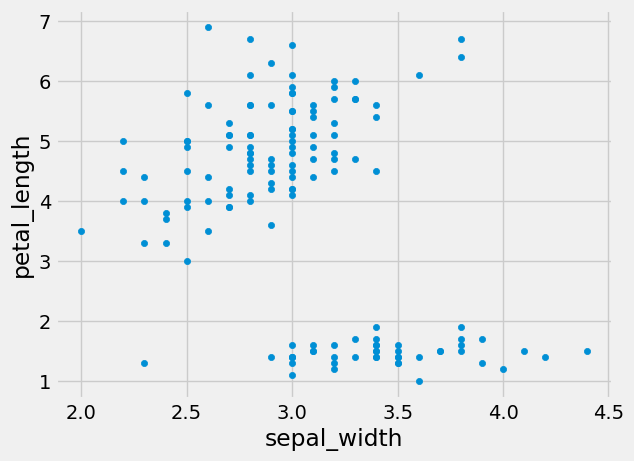

In [25]:
df.plot(kind='scatter',x='sepal_width',y='petal_length')

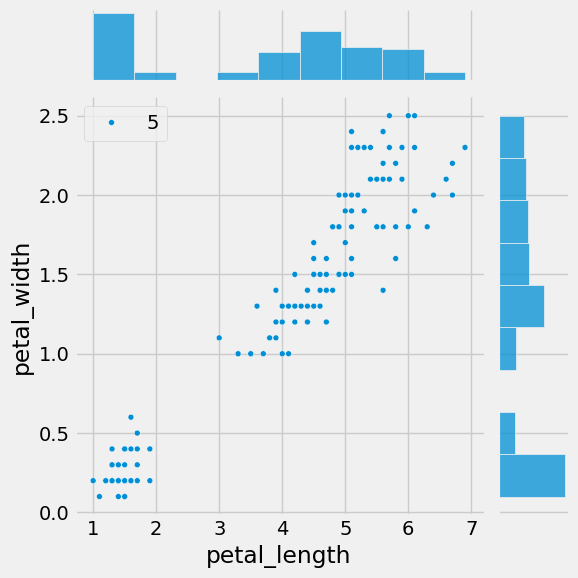

In [28]:
sns.jointplot(x="petal_length", y="petal_width", data=df, size=5)

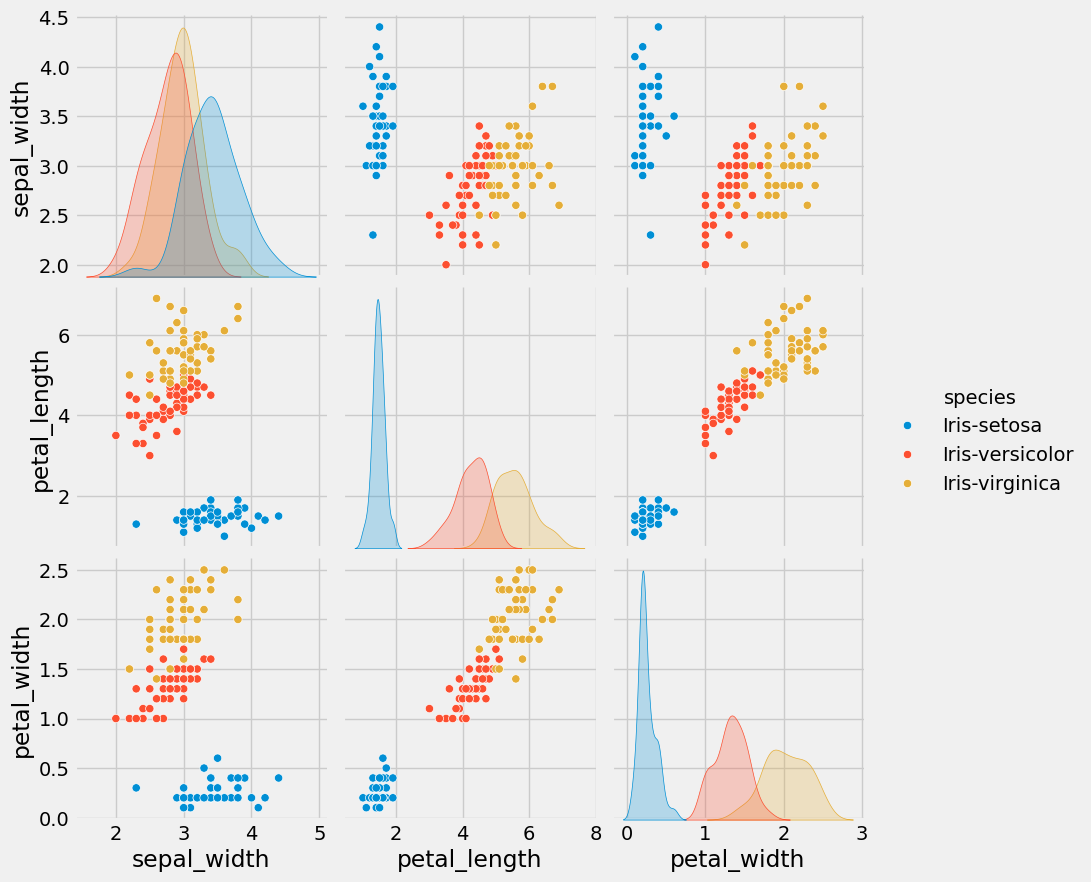

In [34]:
sns.pairplot(df, hue="species", size=3)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_width'}, xlabel='[species]'>,
        <Axes: >]], dtype=object)

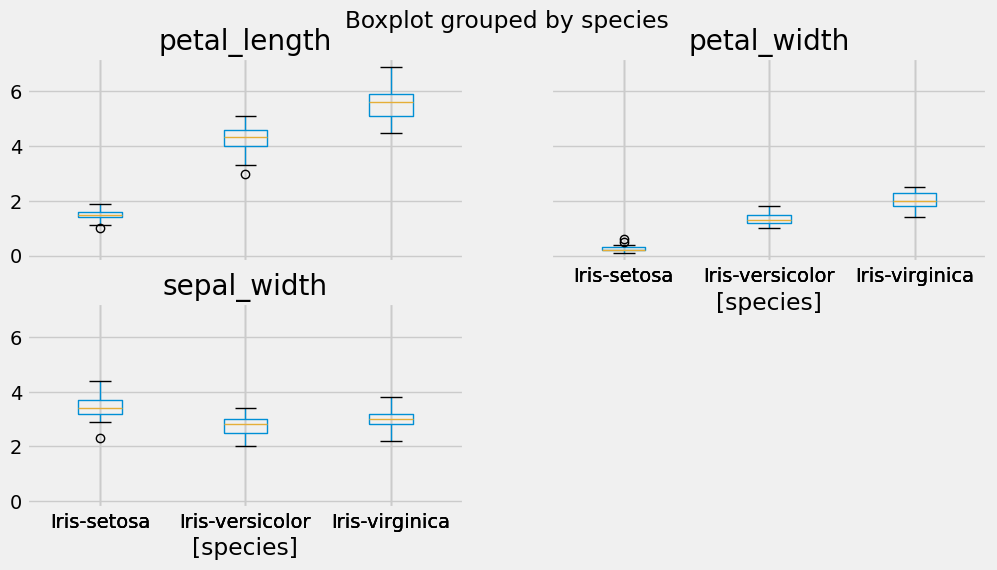

In [36]:
df.boxplot(by="species", figsize=(12, 6))

<Axes: >

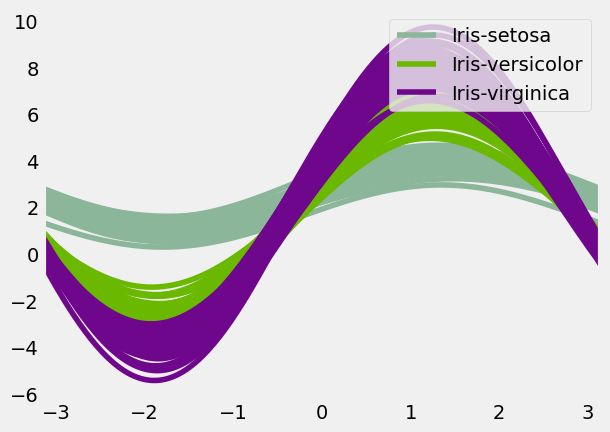

In [38]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species")

<Figure size 1500x1500 with 0 Axes>

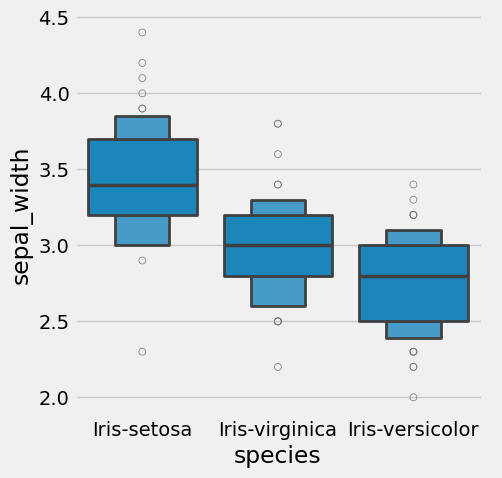

In [39]:
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

<Axes: xlabel='species', ylabel='sepal_width'>

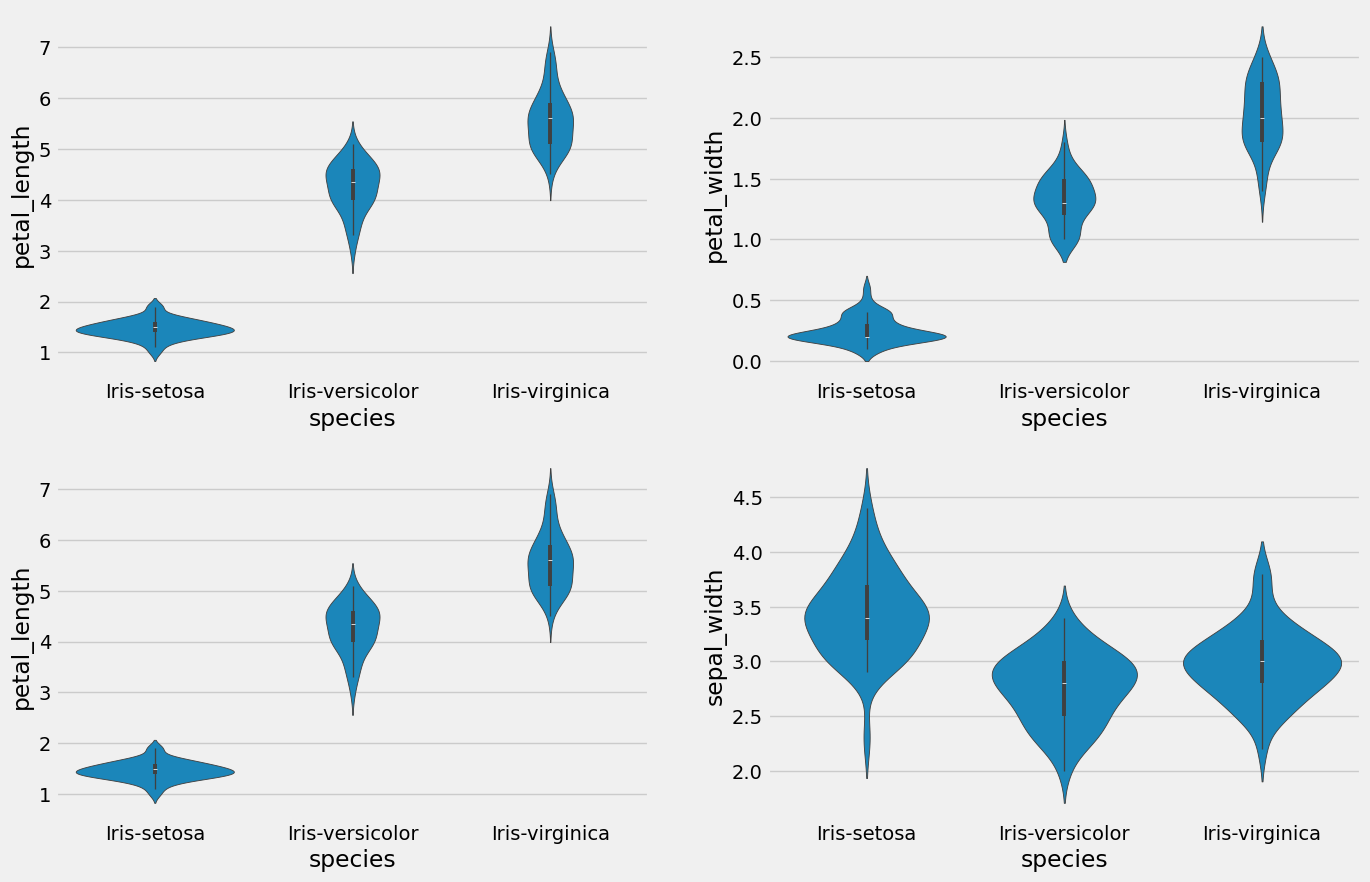

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [46]:
#Neural Network
X=df.drop('species',axis=1)
y=df['species']

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [48]:
df['species'] = pd.Categorical(df.species)
df['species'] = df.species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.species)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [50]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
# If X_train has 3 columns, add an additional column of zeros
X_train = np.hstack((X_train, np.zeros((X_train.shape[0], 1))))

# If X_test has 3 columns, add an additional column of zeros
X_test = np.hstack((X_test, np.zeros((X_test.shape[0], 1))))

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (99, 4)
y_train shape: (99, 3)
X_test shape: (43, 4)
y_test shape: (43, 3)


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803 (3.14 KB)
Trainable params: 803 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 11ms/step - loss: 1.6948 - accuracy: 0.3256


[1.6948286294937134, 0.3255814015865326]

In [62]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 1s 742ms/step
[[0.06033401 0.7891592  0.15050676]
 [0.09311363 0.71079063 0.19609576]
 [0.03177109 0.8603042  0.10792466]
 [0.08351486 0.7226727  0.19381247]
 [0.02497075 0.86809045 0.1069387 ]
 [0.04065029 0.8250807  0.13426897]
 [0.02434339 0.87592345 0.09973301]
 [0.01141679 0.9287551  0.05982804]
 [0.02075192 0.885712   0.093536  ]
 [0.03644292 0.8517782  0.11177897]]


In [63]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[1 1 1 1 1 1 1 1 1 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [69]:
import matplotlib.pyplot as plt

In [70]:
history = globals()["history"]

In [94]:
type(history)

pandas.core.frame.DataFrame

In [95]:
history = pd.DataFrame(history)

In [103]:
# import train_test_split to split the dataset into two parts for training and testing
from sklearn.model_selection import train_test_split



In [104]:
# remove species(target) column in input feature(X)
X = df.drop(['species'], axis=1)
# Output/Target (y)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [105]:
# import StandardScaler for Scaling
from sklearn.preprocessing import StandardScaler


In [106]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,sepal_width,petal_length,petal_width
0,-0.393182,-0.139386,0.084711
1,0.074498,0.602490,0.346967
2,-1.562380,-0.310588,-0.308673
3,-0.627022,1.001961,1.133736
4,1.009856,-1.451935,-1.357698


In [107]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

svc=SVC()
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.97


In [108]:
y_pred_train = svc.predict(X_train)
print(y_pred_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

[1 1 1 2 0 1 1 1 0 1 0 2 0 0 2 2 2 0 2 2 1 1 2 2 0 1 0 2 1 1 2 2 2 0 2 2 1
 2 0 2 1 0 2 1 1 0 0 0 2 1 1 0 1 0 2 1 1 2 2 2 2 1 0 1 0 0 2 2 0 0 0 1 0 1
 0 1 2 0 1 1 2 0 0 1 1 2 1 1 2 2 2 0 1 2 2 1 1 0 2 2 0 2 0 0 1 0 2 2 2 1 0
 2 0]
Training-set accuracy score: 0.9735


In [109]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0  9]]
